# Imports

In [27]:
import os
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from spellchecker import SpellChecker
from gensim.models import Word2Vec
import re
import nltk
import contractions
from datetime import datetime
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold
from sklearn.multioutput import MultiOutputClassifier
from sklearn.preprocessing import LabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.layers import Bidirectional
import numpy as np
import spacy
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pickle
import seaborn as sns

# Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/joaocosta/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/joaocosta/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [28]:
# Reading the file and converting it to a DataFrame
def read_file_to_dataframe(filename):
    data = []
    
    with open("./data/" + filename, 'r', encoding='utf-8') as file:
        for linha in file:
            linha = linha.strip()  # Remove leading/trailing spaces and newlines
            filme = linha.split('\t')  # Split by tab
            data.append(filme)  # Append the row to the data list
    
    # Convert the list of rows to a pandas DataFrame
    df = pd.DataFrame(data)
    
    return df


# Variaveis onde está os ficheiros de treino e o modelo

In [29]:
#file onde já está o modelo treinado"
model=None
newPKL = "joao3"


#limpesa de ficheiro de treino
data="train"
#ficheiro onde vai ser feita ao autoavaliacao
avaliation = "test_no_labels"

In [30]:
print("\033[34mData to DataFrame\n\033[0m")
# Example usage
df = read_file_to_dataframe(data+".txt")
print(df)

Data to DataFrame

                              0          1        2                        3  \
0                  Ela Cheppanu     Telugu  romance                   Ramana   
1     A Nightmare on Elm Street   American   horror             Samuel Bayer   
2               American Gothic   American   horror               John Hough   
3                          Gang  Bollywood    crime              Mazhar Khan   
4            Intimate Relations    British    drama            Charles Frank   
...                         ...        ...      ...                      ...   
8036              Sa 'Yo Lamang   Filipino    drama          Laurice Guillen   
8037          The Lemon Sisters   American    drama             Joyce Chopra   
8038      Dil Ne Phir Yaad Kiya  Bollywood  romance                  Unknown   
8039  Rehnaa Hai Terre Dil Mein  Bollywood  romance            Gautham Menon   
8040             Things to Come    British   sci-fi  William Cameron Menzies   

                    

8041
Average word count: 370.33


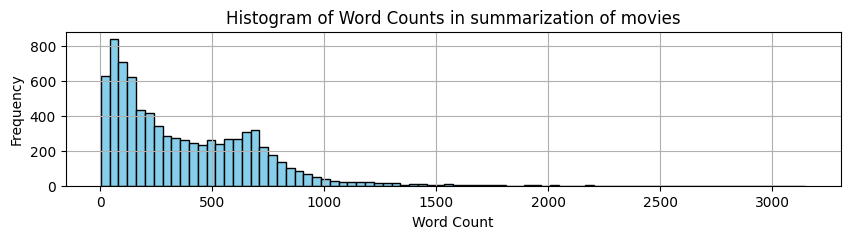

In [31]:
# histogram of word count
print(len(df))

df['word_count'] = df[4].apply(lambda x: len(x.split()))
avg_word_count = df['word_count'].mean()
print(f'Average word count: {avg_word_count:.2f}')
# Plotting the histogram of word counts
plt.figure(figsize=(10, 2))
plt.hist(df['word_count'], bins=80, color='skyblue', edgecolor='black')
plt.title('Histogram of Word Counts in summarization of movies')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


the: 161014
to: 111607
and: 106034
a: 80092
of: 53504
is: 49072
his: 43843
in: 43811
he: 30869
that: 30744


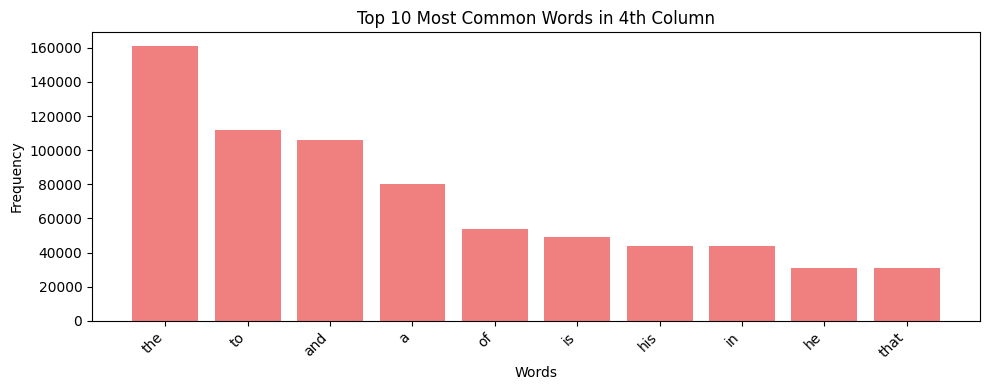

In [32]:
# Flatten all words from the 4th column into a single list
all_words = [word for row in df[4] for word in row.split()]

word_counter = Counter(all_words)

top_10_words = word_counter.most_common(10)

for word, count in top_10_words:
    print(f"{word}: {count}")

words, counts = zip(*top_10_words)

plt.figure(figsize=(10, 4))
plt.bar(words, counts, color='lightcoral')
plt.title('Top 10 Most Common Words in 4th Column')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate word labels for better readability
plt.tight_layout()
plt.show()

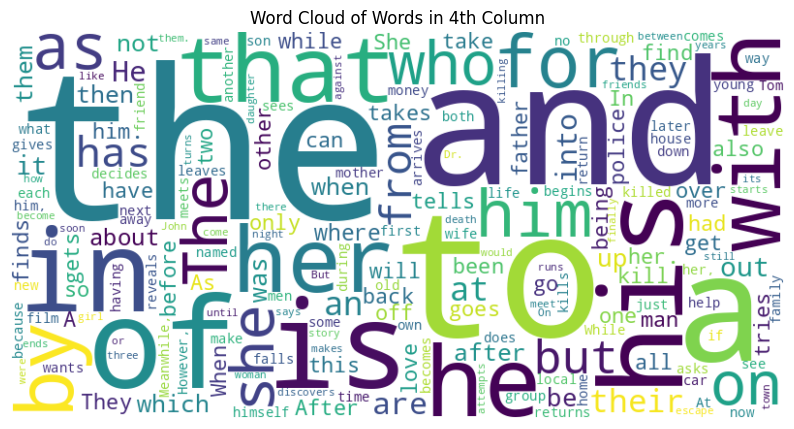

In [33]:
# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counter)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.title('Word Cloud of Words in 4th Column')
plt.show()

In [34]:
# Check for typos using the pyspellchecker
spell = SpellChecker()
misspelled_words = spell.unknown(all_words)  # Identify misspelled words

# Display the number of potential typos
print(f"Number of potential typos: {len(misspelled_words)}")

# Optionally, print the misspelled words
print("\nPotential typos detected:")
for word in misspelled_words:
    print(word)

Number of potential typos: 110045

Potential typos detected:
recoil,
junior),
lwin
10-year-long
priya’s
stannard,
(now
unfaithful.
del.
photography,
conduct.
(meighan)
solace,
rangeland
tristan,
convention,
tomonari
three)
kuanana
bopanna)
men—knowing
patroltec
nicholls
chhagan
woman'
seuss's
larroquette)
(st.
bruner,
clinic.
darry,
michigan
spider,
recorder,
bloomsberry
combination.
glover,
yashiromaru,
growing-up
unnikrishnan’s
marschz
terry,
built.
niro),
rabbititis
amos,
decapitron
piglet.
mu-seong)
speidel).
peazant,
peace,
sharp).
spiel.
dehner),
craden,
failed,
hanoi,
tuberculosis.
strabonitz
canaan,
joint.
guesthouse.
blakedown
chi-yan
kamal,
marsan)
sister;
'how
park.
neff
them;
'some
alexandra's
naxalite
wrong:
genitals,
kilton
acclaim,
shweta
rajkumar),
gao,
kayal,
“gunin”.
first-class
ringo’s
pactio,
isabel
iron-fisted
accountants,
wisdom.
बाप
dakshinagiri
sharing.
developments.
sanji
bar.
corinthians
(sunil),
beddows
heart.[i]
buress)
biren's
mcintire)
left),
mitsuko,
anan

## Pre Processamento

In [35]:
# Function to standardize dates
def standardize_dates(text):
    def _month_to_number(month_name):
        try:
            return datetime.strptime(month_name, "%b").month  # Abbreviated month names (e.g., "Feb")
        except ValueError:
            try:
                return datetime.strptime(month_name, "%B").month  # Full month names (e.g., "February")
            except ValueError:
                return None  # Return None for invalid month names

    def _handle_two_digit_year(year):
        if not year:  # If year is None or empty
            return ""
        year = int(year)
        return year + 2000 if year < 100 else year

    # Date normalization using regex
    text = re.sub(
        r'(\b[A-Za-z]+) (\d{1,2})(?:st|nd|rd|th)?(?:,)? (\d{4})?',
        lambda match: (
            f"{int(match.group(2)):02d}/{_month_to_number(match.group(1)):02d}/{match.group(3)}"
            if _month_to_number(match.group(1)) is not None and match.group(3)  # Ensure month and year exist
            else f"{int(match.group(2)):02d}/{_month_to_number(match.group(1)):02d}"
            if _month_to_number(match.group(1)) is not None  # Ensure month exists
            else match.group(0)  # Return original text if invalid month
        ),
        text
    )

    # Handle formats like "8-Feb-2013"
    text = re.sub(
        r'(\d{1,2})(?:st|nd|rd|th)?[-/.](\b[A-Za-z]+)\b[-/.]?(\d{2,4})?',
        lambda match: (
            f"{int(match.group(1)):02d}/{_month_to_number(match.group(2)):02d}/{_handle_two_digit_year(match.group(3))}"
            if _month_to_number(match.group(2)) is not None and match.group(3)  # Ensure month and year exist
            else f"{int(match.group(1)):02d}/{_month_to_number(match.group(2)):02d}"
            if _month_to_number(match.group(2)) is not None  # Ensure month exists
            else match.group(0)  # Return original text if invalid month
        ),
        text
    )

    return text

In [36]:
# lowercasing
def lowercase_text(text):
    return text.lower()

In [37]:
# stop words
stop_words = set(stopwords.words('english'))
def remove_stopwords(text, stop_words=stop_words):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words and word.lower()]
    return " ".join(filtered_words)

In [38]:
#contractions
def expand_contractions(text):
    if not isinstance(text, str) or not text:
        # Return an empty string or the original text if it's not a valid string
        return text

    try:
        # Use contractions.fix to expand contractions in the text
        return contractions.fix(text)
    except IndexError as e:
        print(f"IndexError encountered: {e}")
        # Optionally return the original text if there's an error
        return text


In [39]:
# Remove punctuation except for specific cases like "Dr." or "Mr."
def remove_punctuation(text):
    # Replace specific abbreviations with placeholders
    text = re.sub(r'\b(Dr|Mr|Ms|Mrs)\.', r'\1_PLACEHOLDER_', text)
    
    # Remove all punctuation
    text = re.sub(r'[^\w\s]', '', text)
    
    # Restore the abbreviations
    text = text.replace('_PLACEHOLDER_', '.')
    
    return text

In [40]:
nlp = spacy.load("en_core_web_sm")

def lemmatize_text(text):
    # Process the text with spaCy
    doc = nlp(text)
    # Extract and return lemmatized words
    lemmatized_words = [token.lemma_ for token in doc]
    return " ".join(lemmatized_words)

In [41]:
def remove_references(text):
    # Substituir ".[\d]" por "."
    text = re.sub(r'\.\[\d+\]', '.', text)
    
    return text

In [42]:
print("\033[34mPre Processing the data\n\033[0m")
def preprocess_text(text):
    text = expand_contractions(text)       # Step 1: Expand contractions
    text = standardize_dates(text)         # Step 2: Normalize dates
    text = lowercase_text(text)            # Step 3: Convert to lowercase
    text = remove_punctuation(text)        # Step 4: Remove punctuation but keep specific cases
    text = remove_stopwords(text)          # Step 5: Remove stopwords
    text = lemmatize_text(text)            # Step 6: Lemmatize the text
    text = remove_references(text)         # Step 7: Remove references
    return text

# Example usage

df.iloc[:, 4] = df.iloc[:, 4].apply(preprocess_text)

print("\033[32mPre Processing Completed!\n\033[0m")

Pre Processing the data

IndexError encountered: string index out of range
IndexError encountered: string index out of range
Pre Processing Completed!



## Carregar o modelo ou Criar um novo
#### Conforme o nome dado a variavel 'newPKL'

In [43]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-mpnet-base-v2')  # Choose a suitable model from HuggingFace model hub

In [44]:
plot_embeddings = model.encode(df.iloc[:, 4], convert_to_tensor=True)

In [45]:
plot_embeddings = plot_embeddings.cpu().numpy()  # Convert to NumPy array
# Split the data
X_train, X_test, y_train, y_test = train_test_split(plot_embeddings, df.iloc[:, 2], test_size=0.2, random_state=42)


In [46]:
from sklearn.neural_network import MLPClassifier

# Initialize MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(512, 256), max_iter=500, random_state=42)

# Train the model
mlp.fit(X_train, y_train)

# Evaluate the model
accuracy = mlp.score(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Test Accuracy: 65.51%


In [47]:
# Necessary imports
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from sentence_transformers import SentenceTransformer
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.utils import to_categorical
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers
from tensorflow_addons.metrics import F1Score
# Encode genre labels to integers
label_encoder = LabelEncoder()
y_train_int = label_encoder.fit_transform(y_train).ravel()  # Ensures labels are 1D
y_test_int = label_encoder.transform(y_test).ravel()        # Ensures labels are 1D

# Compute class weights with integer labels
class_weights = compute_class_weight('balanced', classes=np.unique(y_train_int), y=y_train_int)
class_weights = dict(enumerate(class_weights))

# Now, one-hot encode the labels after computing class weights
from tensorflow.keras.utils import to_categorical
y_train_encoded = to_categorical(y_train_int, num_classes=9)
y_test_encoded = to_categorical(y_test_int, num_classes=9)

# Define the MLP model architecture
input_layer = Input(shape=(X_train.shape[1],))
mlp = Dense(228, activation='relu')(input_layer)
mlp = Dropout(rate=0.5)(mlp)
mlp = Dense(94, activation='relu')(mlp)
mlp = Dropout(rate=0.5)(mlp)
output_layer = Dense(9, activation='softmax')(mlp)

# Build and compile the model
mlp_model = Model(inputs=input_layer, outputs=output_layer)
mlp_model.compile(
    optimizer=optimizers.Nadam(learning_rate=0.01),
    loss='categorical_crossentropy',  # Change to categorical crossentropy for one-hot encoded labels
    metrics=[
        'accuracy',
        F1Score(num_classes=9, average='weighted', name="f1_score_weighted"),
        F1Score(num_classes=9, average='micro', name="f1_score_micro"),
        F1Score(num_classes=9, average='macro', name="f1_score_macro")
    ]
)

# Set up early stopping
es = EarlyStopping(monitor='val_loss', mode='min', patience=2, restore_best_weights=True)

# Train the model
history = mlp_model.fit(X_train, y_train_encoded, validation_split=0.2, epochs=20, batch_size=16,
                        callbacks=[es], shuffle=True, class_weight=class_weights)

Epoch 1/20
322/322 [==============================] - 20s 58ms/step - loss: 1.5328 - accuracy: 0.4099 - f1_score_weighted: 0.4007 - f1_score_micro: 0.4099 - f1_score_macro: 0.4111 - val_loss: 1.1222 - val_accuracy: 0.5944 - val_f1_score_weighted: 0.5667 - val_f1_score_micro: 0.5944 - val_f1_score_macro: 0.5825
Epoch 2/20
322/322 [==============================] - 9s 27ms/step - loss: 1.3254 - accuracy: 0.4793 - f1_score_weighted: 0.4706 - f1_score_micro: 0.4793 - f1_score_macro: 0.4863 - val_loss: 1.1969 - val_accuracy: 0.5579 - val_f1_score_weighted: 0.5302 - val_f1_score_micro: 0.5579 - val_f1_score_macro: 0.5671
Epoch 3/20
322/322 [==============================] - 11s 33ms/step - loss: 1.2638 - accuracy: 0.5131 - f1_score_weighted: 0.5032 - f1_score_micro: 0.5131 - f1_score_macro: 0.5229 - val_loss: 1.1243 - val_accuracy: 0.6325 - val_f1_score_weighted: 0.6344 - val_f1_score_micro: 0.6325 - val_f1_score_macro: 0.6325


51/51 [==============================] - 2s 38ms/step - loss: 1.1223 - accuracy: 0.5898 - f1_score_weighted: 0.5587 - f1_score_micro: 0.5898 - f1_score_macro: 0.5687
Test Accuracy: [1.1223387718200684, 0.5898073315620422, 0.5587167739868164, 0.5898073315620422, 0.5687366724014282]


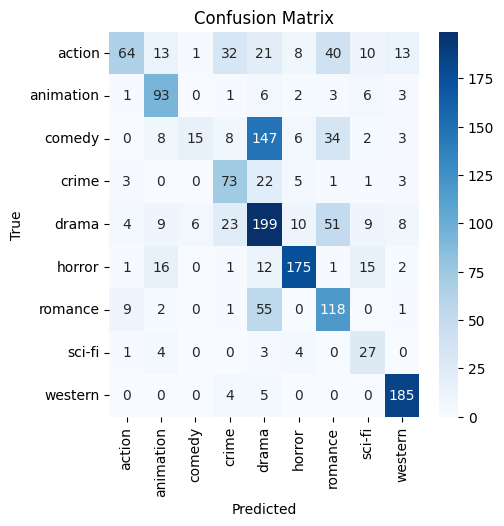

In [48]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on the test set
y_pred_probs = mlp_model.predict(X_test)  # This gives probabilities
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class labels

# Convert one-hot encoded y_test_encoded back to integer labels
y_test_int = np.argmax(y_test_encoded, axis=1)

test_accuracy2 = mlp_model.evaluate(X_test, y_test_encoded)
print(f"Test Accuracy: {test_accuracy2}")

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test_int, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [49]:
# Necessary imports
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from sentence_transformers import SentenceTransformer
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.utils import to_categorical
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers
from tensorflow_addons.metrics import F1Score

# Load sentence transformer model and encode movie plots
model = SentenceTransformer('all-mpnet-base-v2')  # Using 'all-mpnet-base-v2' model

plot_embeddings = model.encode(df.iloc[:, 4], convert_to_tensor=True)
plot_embeddings = plot_embeddings.cpu().numpy()  # Convert to NumPy array

Epoch 1/20
611/611 [==============================] - 31s 45ms/step - loss: 1.5942 - accuracy: 0.4116 - f1_score_weighted: 0.3690 - f1_score_micro: 0.4116 - f1_score_macro: 0.3473 - val_loss: 1.2302 - val_accuracy: 0.6091 - val_f1_score_weighted: 0.7266 - val_f1_score_micro: 0.6091 - val_f1_score_macro: 0.2569
Epoch 2/20
611/611 [==============================] - 16s 26ms/step - loss: 1.3469 - accuracy: 0.4952 - f1_score_weighted: 0.4605 - f1_score_micro: 0.4952 - f1_score_macro: 0.4422 - val_loss: 0.7732 - val_accuracy: 0.8551 - val_f1_score_weighted: 0.9184 - val_f1_score_micro: 0.8551 - val_f1_score_macro: 0.3016
Epoch 3/20
611/611 [==============================] - 22s 36ms/step - loss: 1.2949 - accuracy: 0.5094 - f1_score_weighted: 0.4743 - f1_score_micro: 0.5094 - f1_score_macro: 0.4565 - val_loss: 1.0805 - val_accuracy: 0.6987 - val_f1_score_weighted: 0.8102 - val_f1_score_micro: 0.6987 - val_f1_score_macro: 0.2656
Epoch 4/20
611/611 [==============================] - 10s 16ms/s

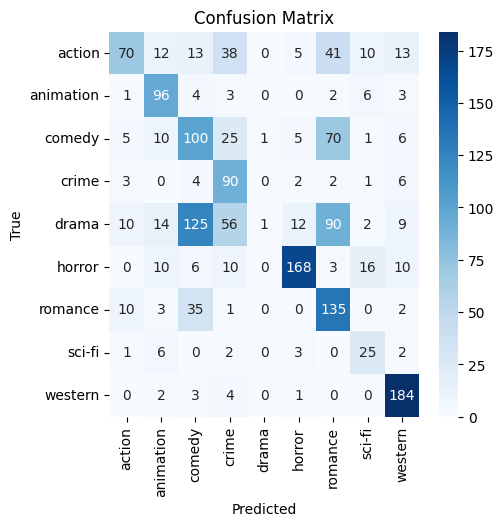

In [50]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(plot_embeddings, df.iloc[:, 2], test_size=0.2, random_state=42)

# Encode genre labels to integers
label_encoder = LabelEncoder()
y_train_int = label_encoder.fit_transform(y_train).ravel()  # Ensure labels are 1D
y_test_int = label_encoder.transform(y_test).ravel()        # Ensure labels are 1D

# Compute class weights with integer labels (for handling class imbalance)
class_weights = compute_class_weight('balanced', classes=np.unique(y_train_int), y=y_train_int)
class_weights = dict(enumerate(class_weights))

# Apply SMOTE to oversample minority classes in the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train_int)

# One-hot encode the labels after SMOTE oversampling
y_train_encoded_smote = to_categorical(y_train_smote, num_classes=9)
y_test_encoded = to_categorical(y_test_int, num_classes=9)

# Define the MLP model architecture
input_layer = Input(shape=(X_train.shape[1],))
mlp = Dense(50, activation='relu')(input_layer)
mlp = Dropout(rate=0.5)(mlp)
mlp = Dense(20, activation='relu')(mlp)
mlp = Dropout(rate=0.5)(mlp)
output_layer = Dense(9, activation='softmax')(mlp)

# Build and compile the model
mlp_model = Model(inputs=input_layer, outputs=output_layer)
mlp_model.compile(
    optimizer=optimizers.Nadam(learning_rate=0.01),
    loss='categorical_crossentropy',  # Categorical crossentropy for one-hot encoded labels
    metrics=[
        'accuracy',
        F1Score(num_classes=9, average='weighted', name="f1_score_weighted"),
        F1Score(num_classes=9, average='micro', name="f1_score_micro"),
        F1Score(num_classes=9, average='macro', name="f1_score_macro")
    ]
)

# Set up early stopping
es = EarlyStopping(monitor='val_loss', mode='min', patience=2, restore_best_weights=True)

# Train the model using the SMOTE oversampled data
history = mlp_model.fit(X_train_smote, y_train_encoded_smote, validation_split=0.2, epochs=20, batch_size=16,
                        callbacks=[es], shuffle=True, class_weight=class_weights)

# Predict on the test set
y_pred_probs = mlp_model.predict(X_test)  # Get probabilities for each genre
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class labels

# Evaluate the model's performance
test_accuracy2 = mlp_model.evaluate(X_test, y_test_encoded)
print(f"Test Accuracy: {test_accuracy2}")

# Compute the confusion matrix
conf_matrix = confusion_matrix(np.argmax(y_test_encoded, axis=1), y_pred)

# Plot the confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [51]:
print(mlp_model.metrics_names)  # This will list the names of the metrics in the output array

['loss', 'accuracy', 'f1_score_weighted', 'f1_score_micro', 'f1_score_macro']


Epoch 1/20
322/322 [==============================] - 13s 35ms/step - loss: 1.5047 - accuracy: 0.4253 - f1_score_weighted: 0.4158 - f1_score_micro: 0.4253 - f1_score_macro: 0.4272 - val_loss: 1.2883 - val_accuracy: 0.5136 - val_f1_score_weighted: 0.4800 - val_f1_score_micro: 0.5136 - val_f1_score_macro: 0.5204
Epoch 2/20
322/322 [==============================] - 10s 32ms/step - loss: 1.3168 - accuracy: 0.4993 - f1_score_weighted: 0.4907 - f1_score_micro: 0.4993 - f1_score_macro: 0.5077 - val_loss: 1.2025 - val_accuracy: 0.5758 - val_f1_score_weighted: 0.5735 - val_f1_score_micro: 0.5758 - val_f1_score_macro: 0.5812
Epoch 3/20
322/322 [==============================] - 21s 65ms/step - loss: 1.2881 - accuracy: 0.5032 - f1_score_weighted: 0.4974 - f1_score_micro: 0.5032 - f1_score_macro: 0.5115 - val_loss: 1.1440 - val_accuracy: 0.6255 - val_f1_score_weighted: 0.6196 - val_f1_score_micro: 0.6255 - val_f1_score_macro: 0.6277
Epoch 4/20
322/322 [==============================] - 11s 33ms/s

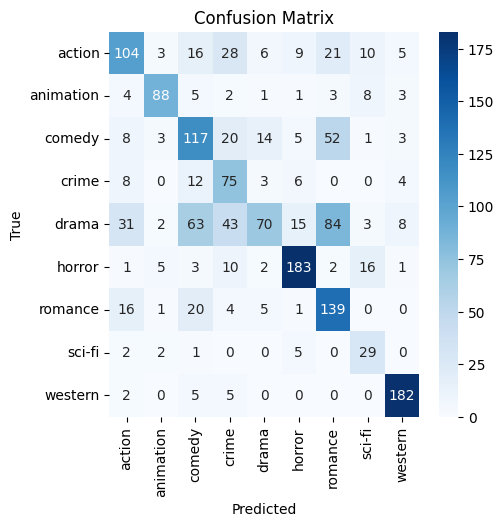

In [52]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(plot_embeddings, df.iloc[:, 2], test_size=0.2, random_state=42)

# Encode genre labels to integers
label_encoder = LabelEncoder()
y_train_int = label_encoder.fit_transform(y_train).ravel()  # Ensure labels are 1D
y_test_int = label_encoder.transform(y_test).ravel()        # Ensure labels are 1D

# Compute class weights with integer labels (for handling class imbalance)
class_weights = compute_class_weight('balanced', classes=np.unique(y_train_int), y=y_train_int)
class_weights = dict(enumerate(class_weights))

# One-hot encode the labels
y_train_encoded = to_categorical(y_train_int, num_classes=9)
y_test_encoded = to_categorical(y_test_int, num_classes=9)

# Define the MLP model architecture
input_layer = Input(shape=(X_train.shape[1],))
mlp = Dense(227, activation='relu')(input_layer)
mlp = Dropout(rate=0.5)(mlp)
mlp = Dense(90, activation='relu')(mlp)
mlp = Dropout(rate=0.5)(mlp)
output_layer = Dense(9, activation='softmax')(mlp)

# Build and compile the model
mlp_model = Model(inputs=input_layer, outputs=output_layer)
mlp_model.compile(
    optimizer=optimizers.Nadam(learning_rate=0.01),
    loss='categorical_crossentropy',  # Categorical crossentropy for one-hot encoded labels
    metrics=[
        'accuracy',
        F1Score(num_classes=9, average='weighted', name="f1_score_weighted"),
        F1Score(num_classes=9, average='micro', name="f1_score_micro"),
        F1Score(num_classes=9, average='macro', name="f1_score_macro")
    ]
)

# Set up early stopping
es = EarlyStopping(monitor='val_loss', mode='min', patience=2, restore_best_weights=True)

# Train the model using the original (non-SMOTE) training data
history = mlp_model.fit(X_train, y_train_encoded, validation_split=0.2, epochs=20, batch_size=16,
                        callbacks=[es], shuffle=True, class_weight=class_weights)

# Predict on the test set
y_pred_probs = mlp_model.predict(X_test)  # Get probabilities for each genre
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class labels

# Evaluate the model's performance
test_accuracy2 = mlp_model.evaluate(X_test, y_test_encoded)
print(f"Test Accuracy: {test_accuracy2}")

# Compute the confusion matrix
conf_matrix = confusion_matrix(np.argmax(y_test_encoded, axis=1), y_pred)

# Plot the confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

/home/joaocosta/miniconda3/envs/LN/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [15:39:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Test Accuracy: 0.6252
Classification Report for XGBoost:
              precision    recall  f1-score   support

      action       0.56      0.62      0.59       202
   animation       0.79      0.67      0.72       115
      comedy       0.52      0.42      0.47       223
       crime       0.57      0.42      0.48       108
       drama       0.53      0.65      0.58       319
      horror       0.76      0.79      0.78       223
     romance       0.58      0.55      0.56       186
      sci-fi       0.48      0.38      0.43        39
     western       0.82      0.85      0.83       194

    accuracy                           0.63      1609
   macro avg       0.62      0.59      0.61      1609
weighted avg       0.63      0.63      0.62      1609



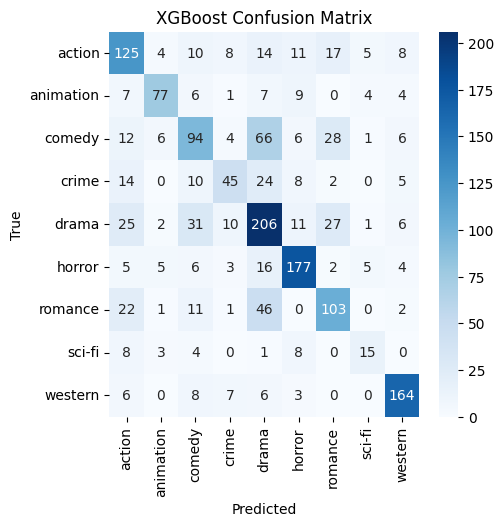

In [53]:
# Necessary imports for XGBoost
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize XGBoost classifier
xgb_model = XGBClassifier(
    objective='multi:softmax',  # Multi-class classification
    num_class=9,                # Number of classes (genres)
    learning_rate=0.01,         # Learning rate
    n_estimators=100,           # Number of trees
    max_depth=6,                # Maximum depth of trees
    eval_metric='mlogloss',     # Logarithmic loss for evaluation
    use_label_encoder=False
)

# Train the model
xgb_model.fit(X_train, y_train_int)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
xgb_accuracy = accuracy_score(y_test_int, y_pred_xgb)
print(f"XGBoost Test Accuracy: {xgb_accuracy:.4f}")

# Classification report for detailed performance
print("Classification Report for XGBoost:")
print(classification_report(y_test_int, y_pred_xgb, target_names=label_encoder.classes_))

# Confusion matrix for XGBoost
conf_matrix_xgb = confusion_matrix(y_test_int, y_pred_xgb)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('XGBoost Confusion Matrix')
plt.show()

SVM Test Accuracy: 0.6178
Classification Report for SVM:
              precision    recall  f1-score   support

      action       0.54      0.63      0.58       202
   animation       0.78      0.79      0.79       115
      comedy       0.46      0.49      0.48       223
       crime       0.56      0.49      0.52       108
       drama       0.50      0.52      0.51       319
      horror       0.82      0.77      0.80       223
     romance       0.53      0.47      0.50       186
      sci-fi       0.52      0.38      0.44        39
     western       0.92      0.89      0.91       194

    accuracy                           0.62      1609
   macro avg       0.63      0.60      0.61      1609
weighted avg       0.62      0.62      0.62      1609



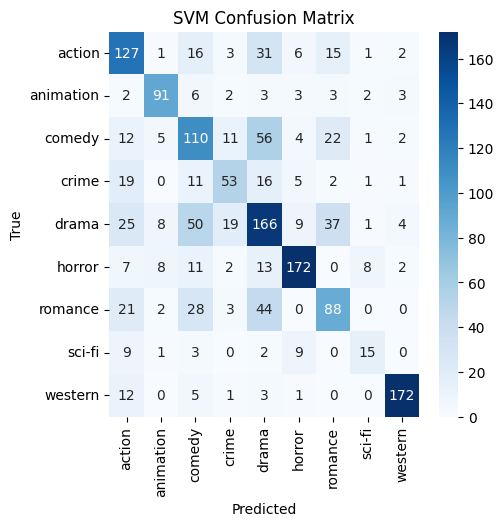

In [54]:
# Necessary imports for SVM
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Standardize the features (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the SVM classifier with a linear kernel (can be 'rbf' or 'poly' for nonlinear)
svm_model = SVC(
    kernel='linear',            # Linear kernel
    decision_function_shape='ovr',  # One-vs-rest for multi-class classification
    probability=True            # Enable probability estimates
)

# Train the SVM model
svm_model.fit(X_train_scaled, y_train_int)

# Predict on the test set
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluate the model
svm_accuracy = accuracy_score(y_test_int, y_pred_svm)
print(f"SVM Test Accuracy: {svm_accuracy:.4f}")

# Classification report for detailed performance
print("Classification Report for SVM:")
print(classification_report(y_test_int, y_pred_svm, target_names=label_encoder.classes_))

# Confusion matrix for SVM
conf_matrix_svm = confusion_matrix(y_test_int, y_pred_svm)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('SVM Confusion Matrix')
plt.show()